# Introduction

## The Business Problem

Our client is a credit card company. 

**Goal: Develop a predictive model for whether an account will default next month, given demographics and historical variables (explanatory variables) for each observation account ID.**


## Dataset 

- Collected in 2005 within April-August.


- **Variables/Columns (25):** demographic and recent (past 6 months: August to April) financial variables for each credit account ID.


- **Observation/Rows (30,000):** credit account IDS.


Rows are labeled (i.e. by the "default payment next month" column) by whether, in the next month after the 6-month historical data period, an account owner has defaulted (i.e. failed to make the minimum payment) --> **object/test variable/response variable**

In [2]:
import pandas as pd

df = pd.read_excel("Data/CreditCards.xls")
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##  Data dictionary 

### Variables overview


### Indexing:


- **ID:** credit account IDS.


### Explanatory variables:


- **LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.


- **SEX:** (1 = male; 2 = female).


- **EDUCATION:** (1 = graduate school; 2 = university; 3 = high school; 4 = others).


- **MARRIAGE:** (1 = married; 2 = single; 3 = others).


- **AGE:** (year).


- **PAY_1-PAY_6:** History of the past monthly repayment(Rimborsi, quanto devi rimborsare) (PAY_1 = repayment status in September, PAY_2 = ... August, PAY_3 = ... July, Pay_4 = ... June, Pay_5 = ... May, PAY_6 = ... April). Measurement scale for each the repayment status (PAY_N): (-1 = pay duly(i.e. pay rigth); 1 = payment delay for 1 month; 2 = ... 2 months; up to 9 = payment delay for 9 months and above.).


- **BILL_AMT1–BILL_AMT6:** Monthly bill statement amount(Estratto conto, capitale utile mensile ) (BILL_AMT1 = Bill statement amount in September, BILL_AMT2 = ... August, BILL_AMT3 = ... July, BILL_AMT4 = ... June, BILL_AMT5 = ... May, BILL_AMT6 = ... April). Measurement scale for each bill statement amount (BILL_AMTN) : (NT dollar).


- **PAY_AMT1–PAY_AMT6:** Monthly previous payment amount (PAY_AMT1 = Bill statement amount in September, PAY_AMT2 = ... August, PAY_AMT3 = ... July, PAY_AMT4 = ... June, PAY_AMT5 = ... May, PAY_AMT6 = ... April). Measurement scale for each previous payment amount (PAY_AMTN) : (NT dollar).


### Response variable:


- **default payment next month:** (0 = No default, 1 = default).


### Goal

**Develop a predictive model for the response variable default payment next month for the credit account IDs given the explanatory variables.**

### Note 

Due to the relative small number of variables we can afford them individually without dimensionality reduction techniques or methods of feature selection.

# EDA (Exploratory Data Analysis) and Cleaning

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

## ID 

In [5]:
df["ID"].nunique()


29687

### Duplicates 

In [6]:
id_counts = df["ID"].value_counts()
id_counts

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: ID, Length: 29687, dtype: int64

In [7]:
id_counts.value_counts()


1    29374
2      313
Name: ID, dtype: int64

313 duplicates of size 2.

In [8]:
dupe_mask = id_counts == 2  # Boolean mask for identify the duplicates of size 2
print(dupe_mask[0:5])
print(id_counts[0:5])


ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64


In [9]:
dupe_ids = id_counts.index[dupe_mask]  # Storing duplicate indexes
dupe_ids = list(dupe_ids)

print(len(dupe_ids))
print(dupe_ids[0:5])


313
['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9']


In [10]:
df.loc[
    df["ID"].isin(dupe_ids[0:3]), :
]  # Masking with respect the first 3 duplicate IDs


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Our duplicates seems observations with all 0 for the variables.


"0 rows" are also invalid data since makes no sense LIMIT_BAL = 0,  AGE = 0, and so on.

In [11]:
df_zero_mask = df == 0  # Boolean mask for 0 rows.
df_zero_mask


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(
    axis=1
)  # For single output for each rows
feature_zero_mask


0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [13]:
sum(feature_zero_mask)  # Boolean sums are equal to the sum of Trues


315

315 0 rows.

In [14]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()
df_clean_1.shape


(29685, 25)

29685 valid IDs.

In [15]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [16]:
df_clean_1.to_csv("Data/df_clean_1.csv", index=False)  # Saving

# Check point

# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL
# SEX
# EDUCATION
# MARRIAGE
# AGE
# PAY_1-PAY_6
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month


# PAY_1-PAY_6

In [17]:
df_clean_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [18]:
df_clean_1["PAY_1"].value_counts()


0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

PAY_1 'Not available' value (for missing) drive the column to be an object type.

In [19]:
# For now I decide to remove this missing type.
valid_pay_1_mask = df_clean_1["PAY_1"] != "Not available"
valid_pay_1_mask


0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: PAY_1, Length: 29685, dtype: bool

In [20]:
sum(valid_pay_1_mask)


26664

26664 valid rows.

In [21]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()
df_clean_2["PAY_1"].value_counts()


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [22]:
# Now that the features are consistent int64 type.
df_clean_2["PAY_1"] = df_clean_2["PAY_1"].astype("int64")
df_clean_2[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
 2   PAY_3   26664 non-null  int64
 3   PAY_4   26664 non-null  int64
 4   PAY_5   26664 non-null  int64
 5   PAY_6   26664 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [23]:
df_clean_2["PAY_1"].value_counts()


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Undocumented values of –2 and 0 in PAY_1.

Learned from the company:

- -2 means the account started that month with a zero balance and never used
any credit.

- 0 means that at least the minimum payment was made, but the entire balance
wasn't paid (that is, a positive balance was carried to the next month).

In [24]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_clean_2[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


'9 = payment delay for nine months and above' seems to not never appear (max = 8 for each PAY_N)

In [25]:
import numpy as np
import matplotlib.pyplot as plt # plotting package
# Plot direct under the cells
%matplotlib inline
import matplotlib as mpl # additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 # high resolution figures

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

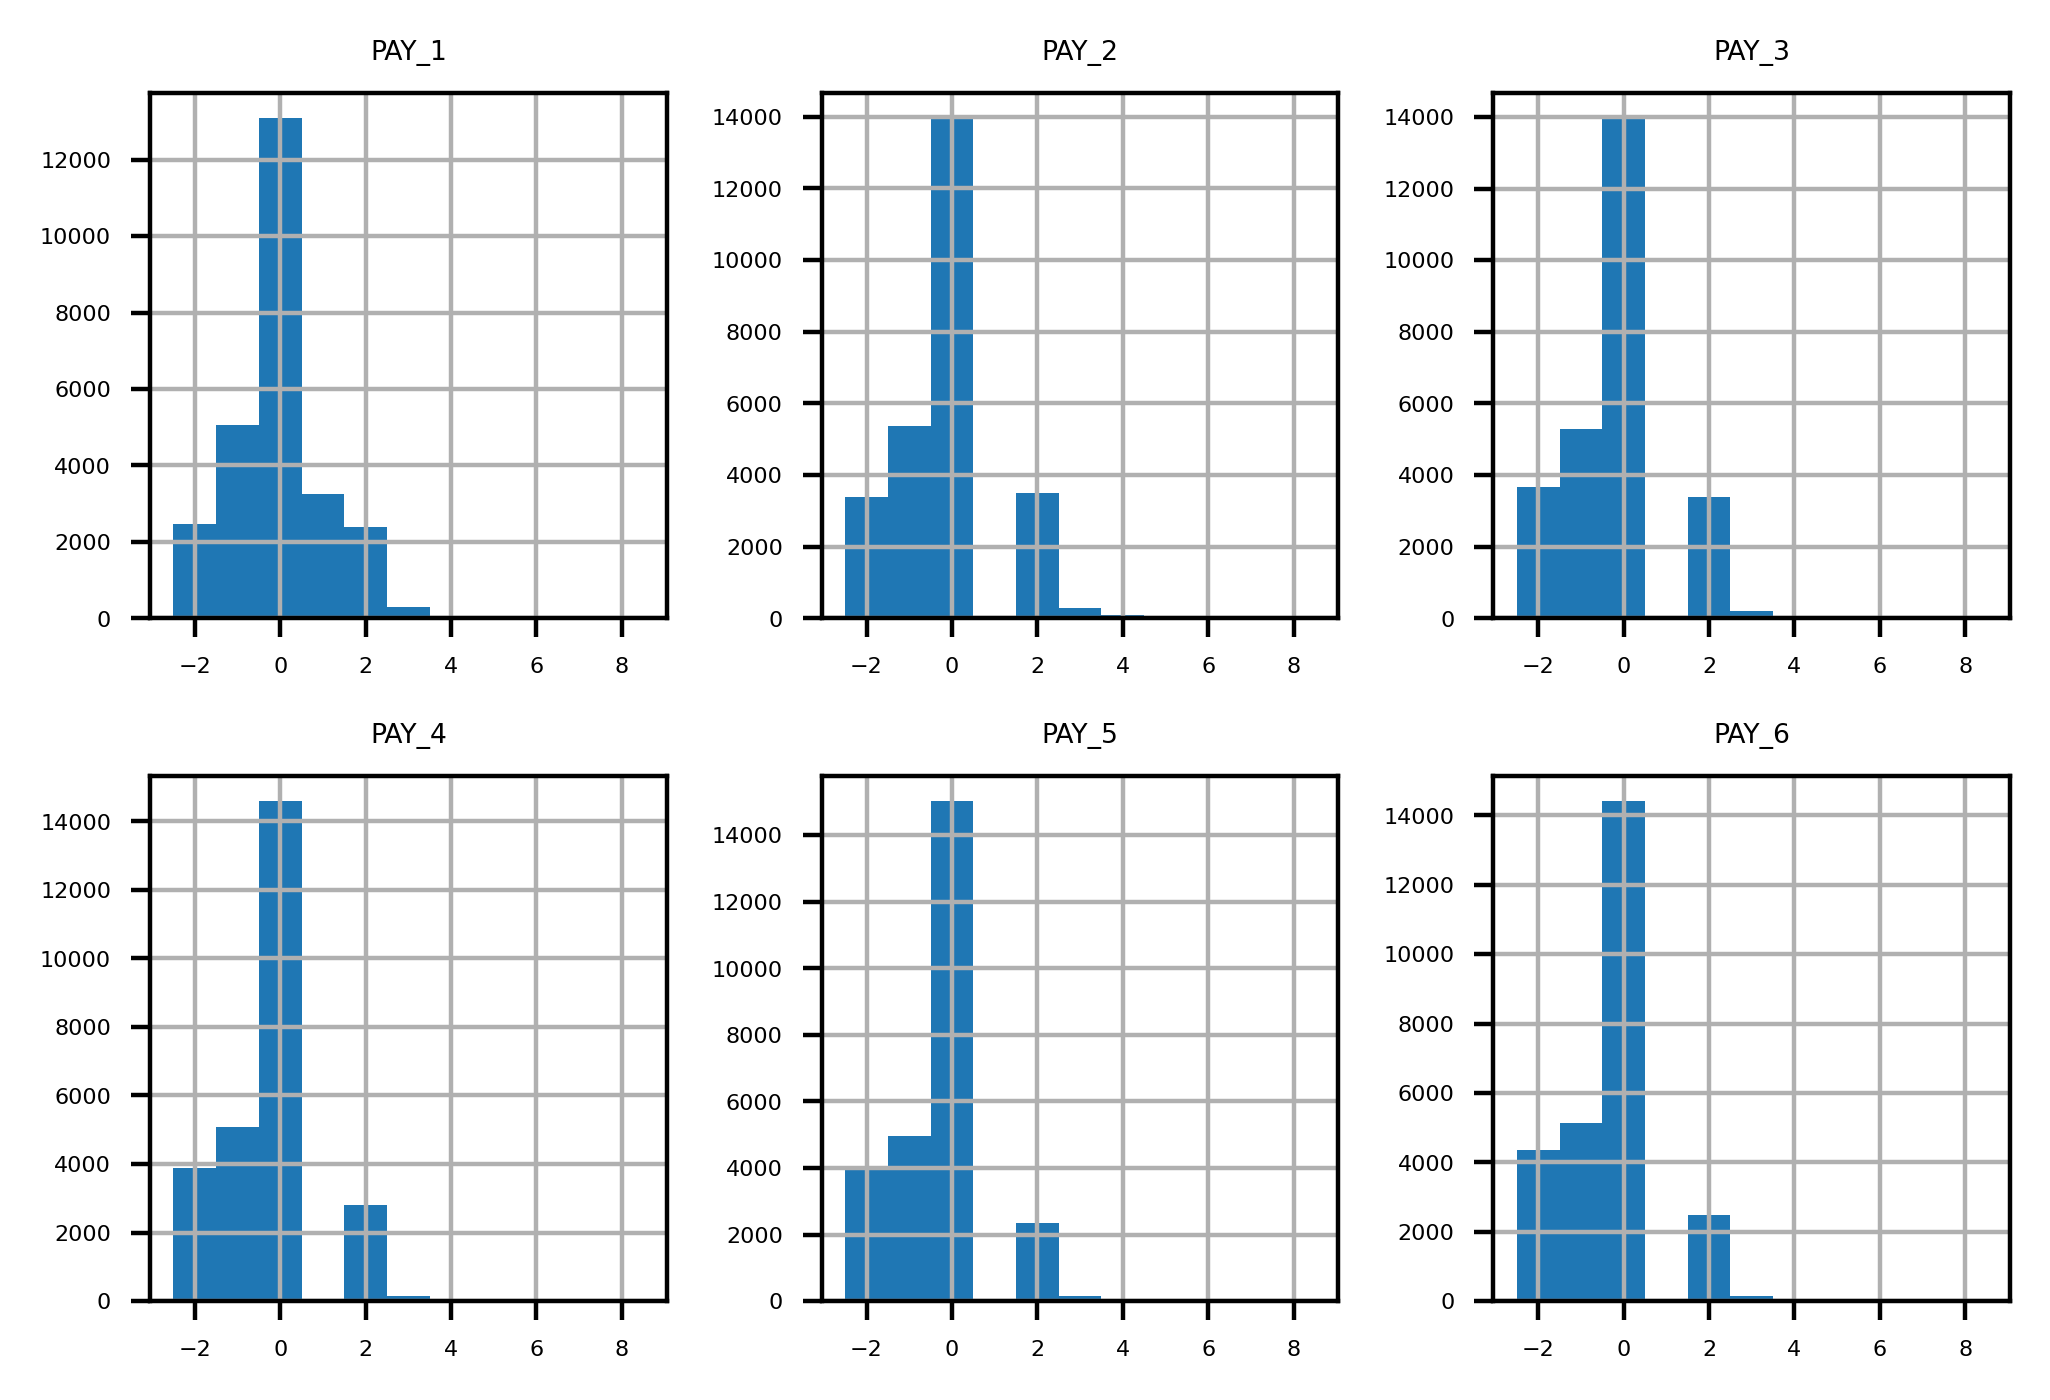

In [26]:
pay_bins = np.array(range(-2,10)) - 0.5 # Array of 12 numbers (11 bins), centered around 1(- 0.5) of the unique values of the PAY features (11 values).
# Since the default number of bins is 10 is always better to set them correctly for realiable results.
# BIN EDGES -> All bins have left edge closed and right open while for the last one are both closed. For control over plot appearance, it's usually better to specify
# the bin edge locations.

mpl.rcParams['font.size'] = 4 
df_clean_2[pay_feats].hist(bins=pay_bins, layout=(2,3))

There are very few accounts that had a 1-month payment delay in July(PAY_3) while in August(PAY_2) there are thousands of accounts with a 2-month payment delay. 

The number of accounts with a 2-month delay in a given month(e.g August/PAY_2) should be <= to the number of accounts with a 1-month delay in the previous month(e.g July/PAY_3). 

Due to this invalid issue in the data recording the only reliable feature is PAY_1 so we can drop variables from PAY_2 up to PAY_6.

When we see something like this in the data is better to check the logic in the query used to create the dataset or contact the creator of the dataset.

Learned from the company:

They had been having problems with pulling the most recent month of data (1-month delay in payment). 

In September(PAY_1), they had "mostly" fixed these problems, that is why there were missing values in the PAY_1 feature, as we found.

In [27]:
df_clean_2.to_csv("Data/df_clean_2.csv", index=False)  # saving

# Check point
# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL
# SEX
# EDUCATION
# MARRIAGE
# AGE
# PAY_1-PAY_6 -> Adjustment Pay_1 type + drop of the missing ("not avaible") + To drop from PAY_2 to PAY_6 since invalid data (Related to the drop of the missing)
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month


# BILL_AMT1–BILL_AMT6

In [56]:
df = df_clean_2.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [57]:
# No missing entries for features BILL_AMT1 – BILL_AMT6
bill_feat = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
df[bill_feat].value_counts()
# df.BILL_AMT1.value_counts()

# Rec: BILL_AMT1–BILL_AMT6: Monthly bill statement amount(Estratto conto, capitale utile mensile )
# (BILL_AMT1 = Bill statement amount in September, BILL_AMT2 = ... August, BILL_AMT3 = ... July, BILL_AMT4 = ... June, BILL_AMT5 = ... May, BILL_AMT6 = ... April). 
# Measurement scale for each bill statement amount (BILL_AMTN) : (NT dollar).

# NB lot of 0 values and REC that is time related features --> look if it has sense


BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0          0          0          0          0          0            774
390        390        390        390        390        390           33
2400       2400       2400       2400       2400       2400          27
2500       0          0          0          0          0             23
1050       1050       1050       1050       1050       1050          18
                                                                   ... 
10083      11211      13669      316        120961     123355         1
           11091      12117      13125      13407      13692          1
10078      8886       8815       9600       0          0              1
10072      7728       2344       9536       9043       0              1
746814     374028     351588     86927      66111      38491          1
Length: 25541, dtype: int64

In [30]:
df[bill_feat].describe()
# Care for the negative values -> admitted, OK

# Seems all to make sense 


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [58]:
len(df["BILL_AMT1"].unique())

20519

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

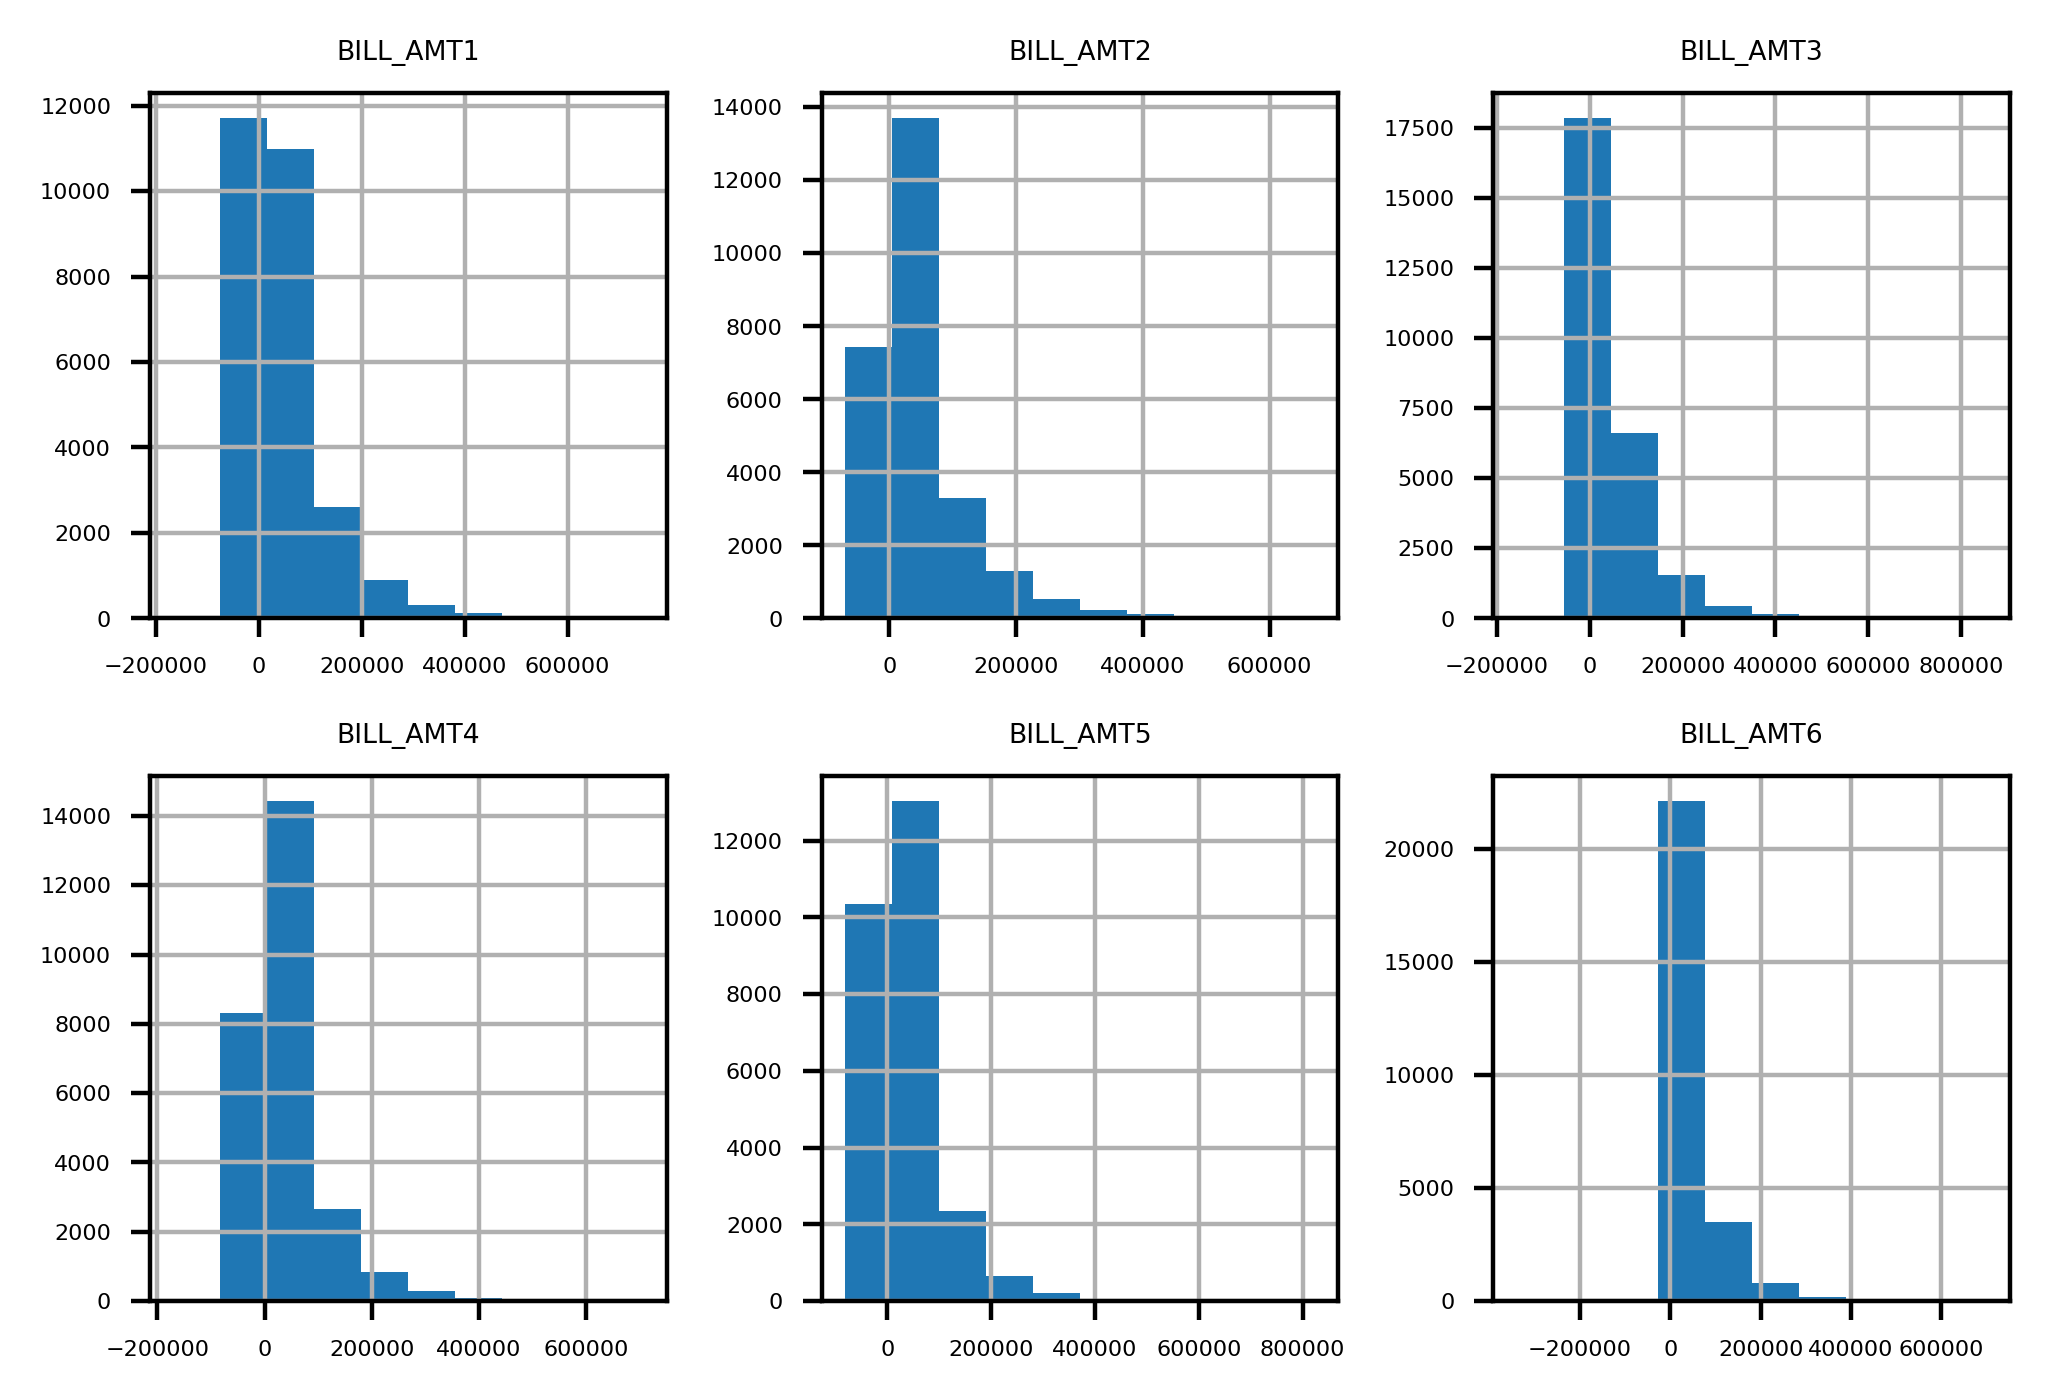

In [59]:
'''bill_bins = np.array(range(1,21)) - 0.5 # 21 centered bins 

mpl.rcParams['font.size'] = 4 
df[bill_feat].hist(bins = bill_bins, layout=(2,3))'''

mpl.rcParams['font.size'] = 4 
df[bill_feat].hist(layout=(2,3))

In [61]:

bill_count = df[bill_feat].value_counts()
bill_count




BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0          0          0          0          0          0            774
390        390        390        390        390        390           33
2400       2400       2400       2400       2400       2400          27
2500       0          0          0          0          0             23
1050       1050       1050       1050       1050       1050          18
                                                                   ... 
10083      11211      13669      316        120961     123355         1
           11091      12117      13125      13407      13692          1
10078      8886       8815       9600       0          0              1
10072      7728       2344       9536       9043       0              1
746814     374028     351588     86927      66111      38491          1
Length: 25541, dtype: int64

# LIMIT_BAL


In [34]:
import matplotlib.pyplot as plt # plotting package
# Plot direct under the cells
%matplotlib inline
import matplotlib as mpl # additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 # high resolution figures

<AxesSubplot:>

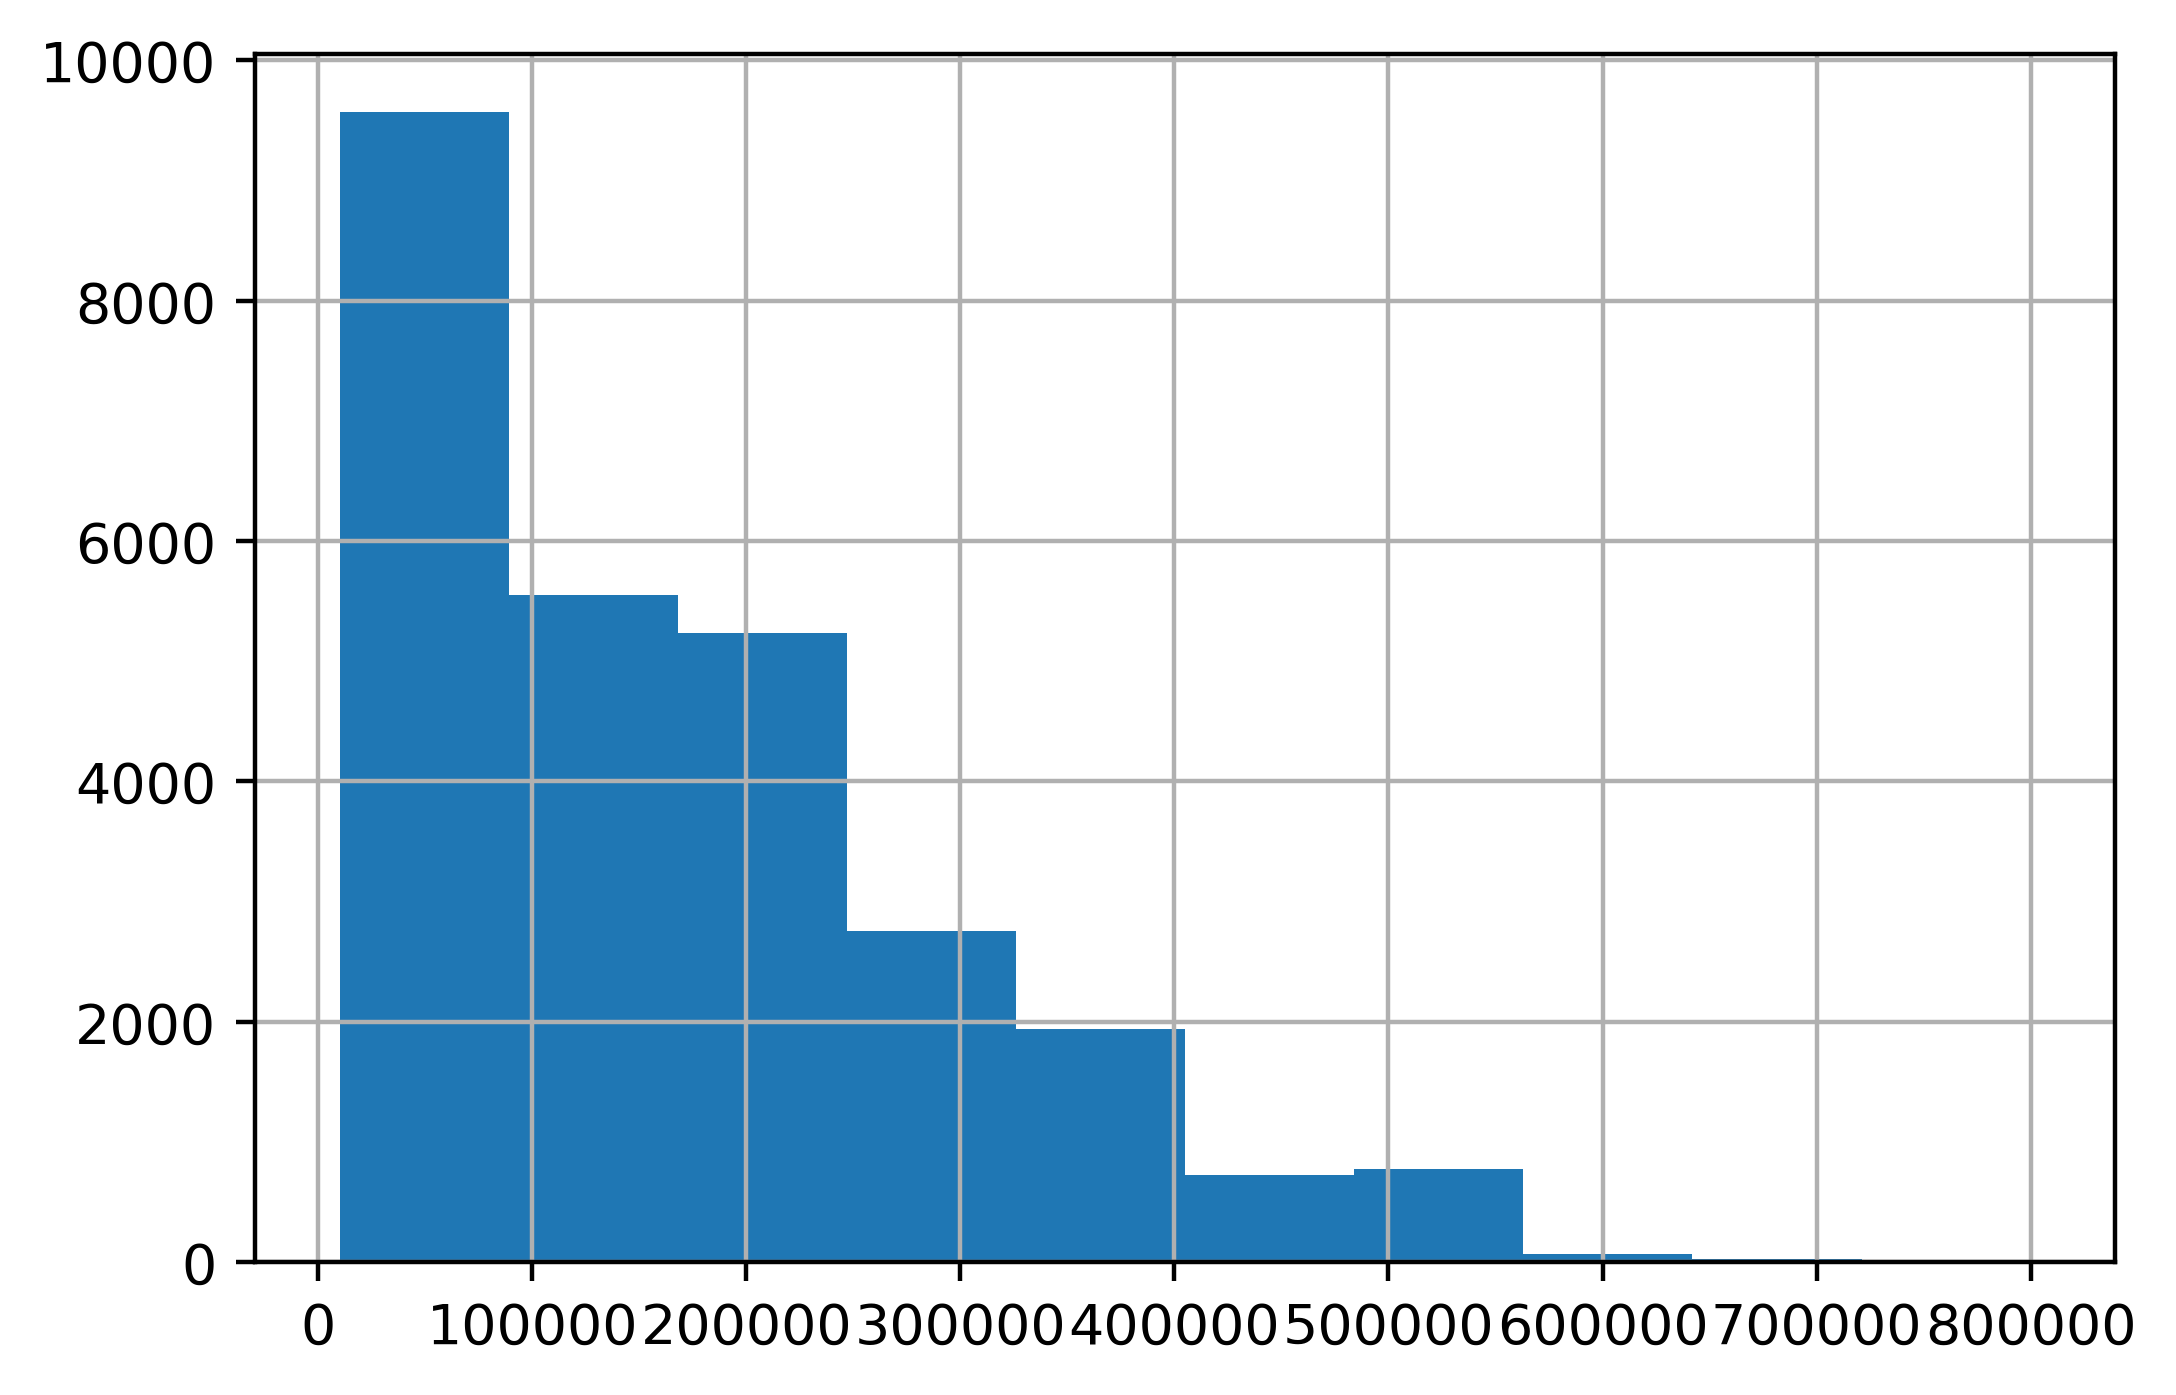

In [35]:
df_clean_2["LIMIT_BAL"].hist()


In [36]:
df_clean_2["LIMIT_BAL"].describe()


count     26664.000000
mean     167919.054905
std      129839.453081
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

'LIMIT_BAL' seems fine since all the all the values are above 0 (min = 10000, no invalid data).

No strange patterns in the hist.

# AGE 

<AxesSubplot:>

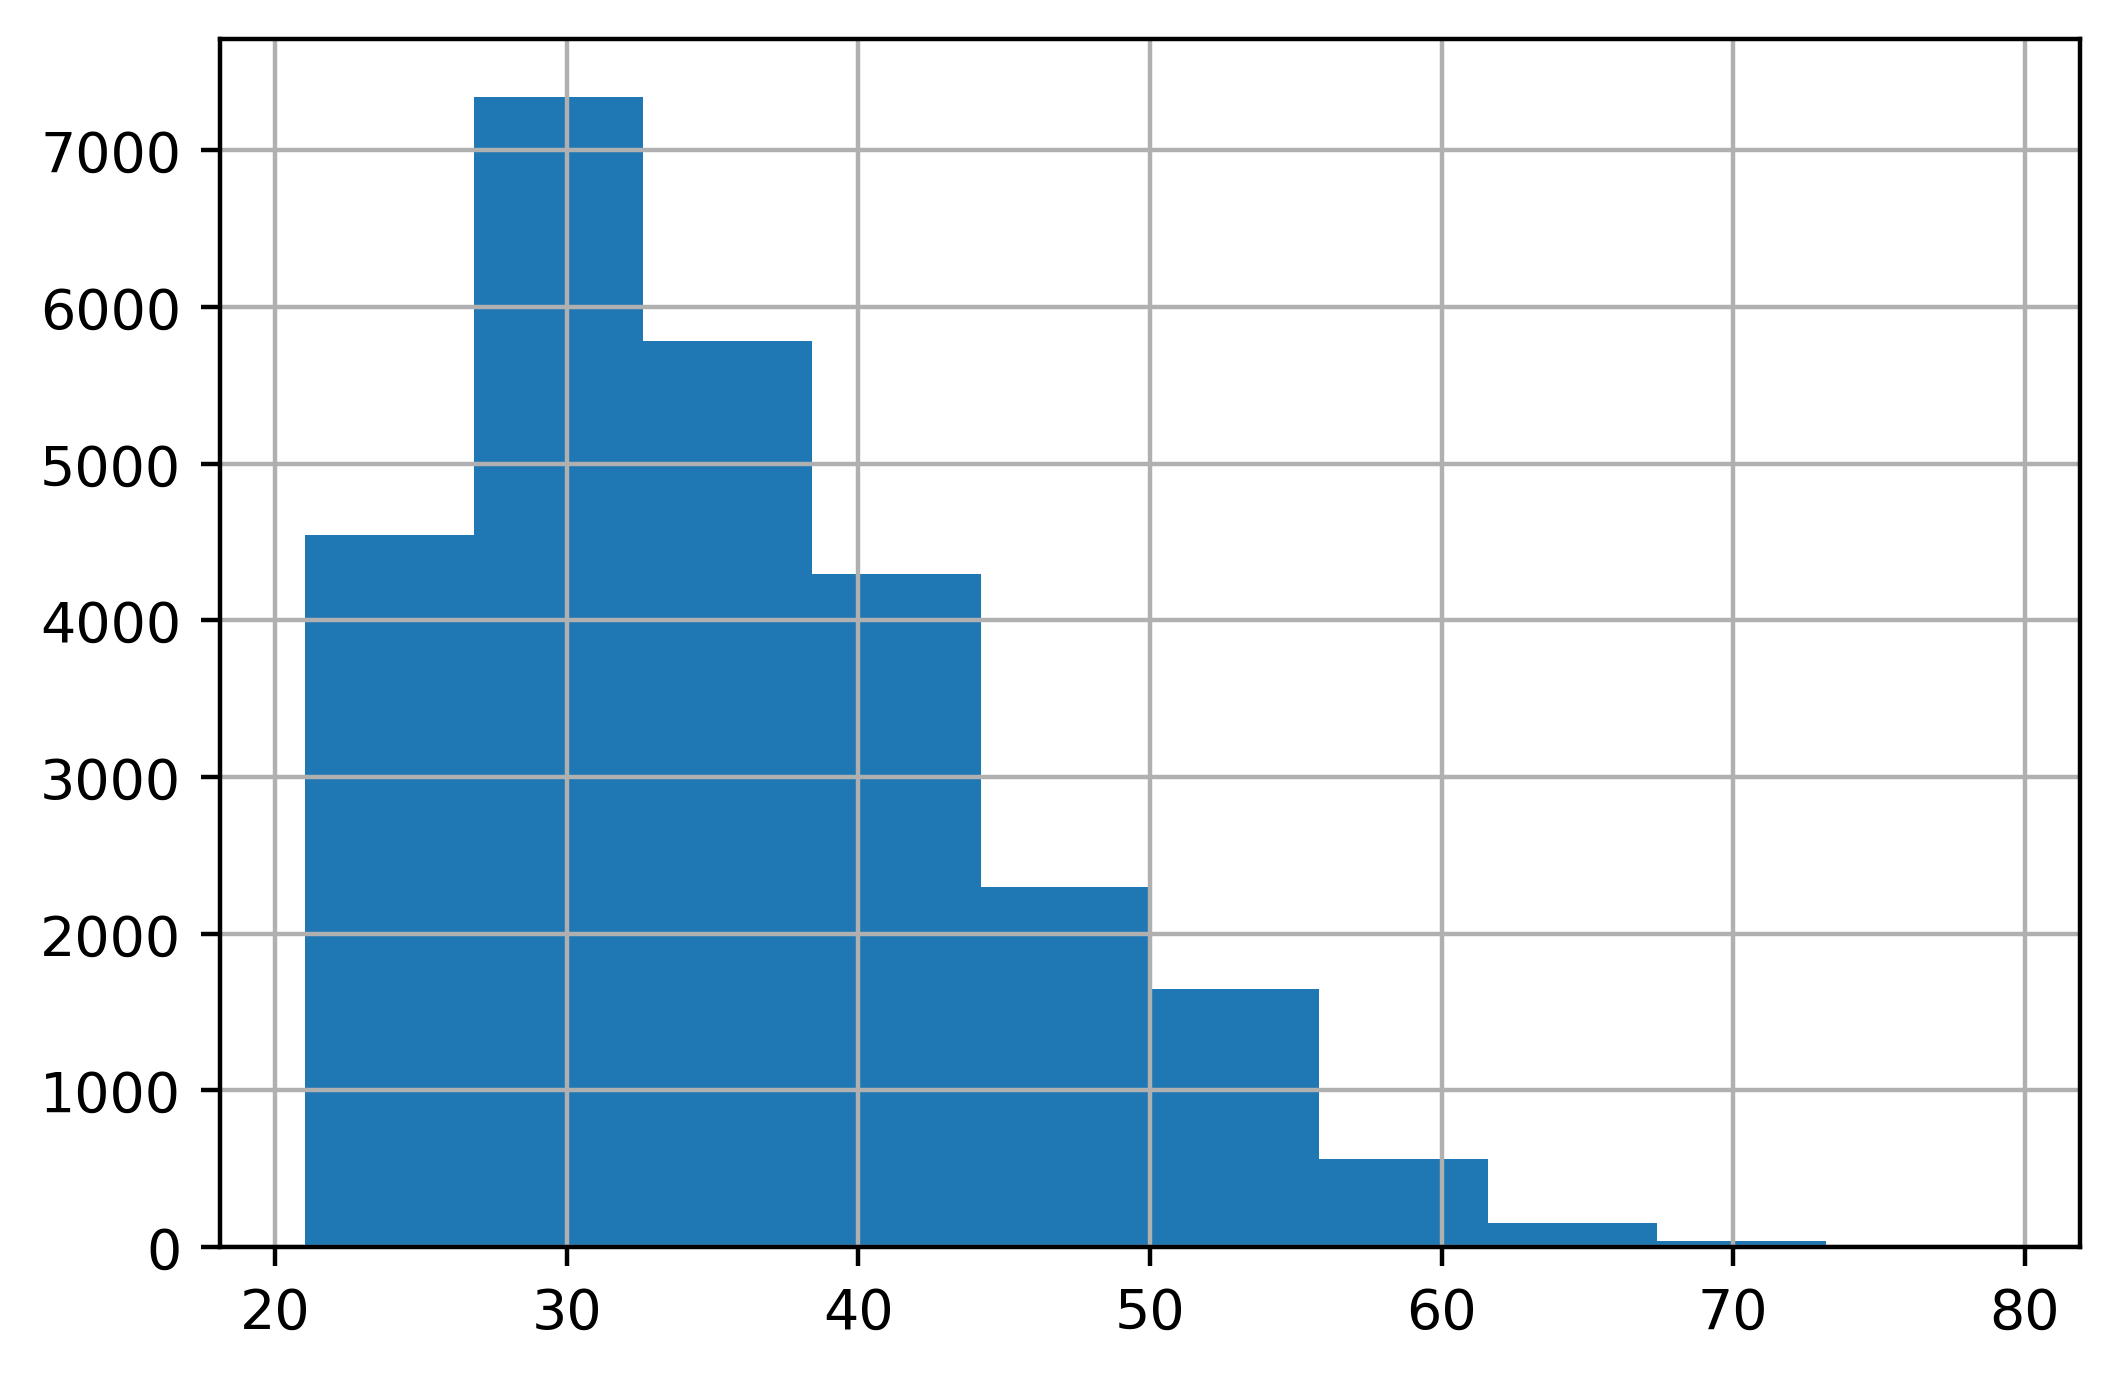

In [37]:
df_clean_2["AGE"].hist()

In [38]:
df_clean_2["AGE"].describe()


count    26664.000000
mean        35.505213
std          9.227442
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

'AGE' seems fine (min = 21, no strange patterns in the hist)

# SEX

In [39]:
df_clean_2["SEX"].value_counts()


2    16080
1    10584
Name: SEX, dtype: int64

No undocumented, values.

# EDUCATION

In [40]:
df_clean_2["EDUCATION"].value_counts()


2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

0, 5, 6 undocumented values.

Since '4 = others' and the counts for '0, 5, 6' are low I merge them with '4 = others'.

In [41]:
df_clean_2["EDUCATION"].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2["EDUCATION"].value_counts()


2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

           default payment next month
EDUCATION                            
1                            0.193901
2                            0.235913
3                            0.255479
4                            0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

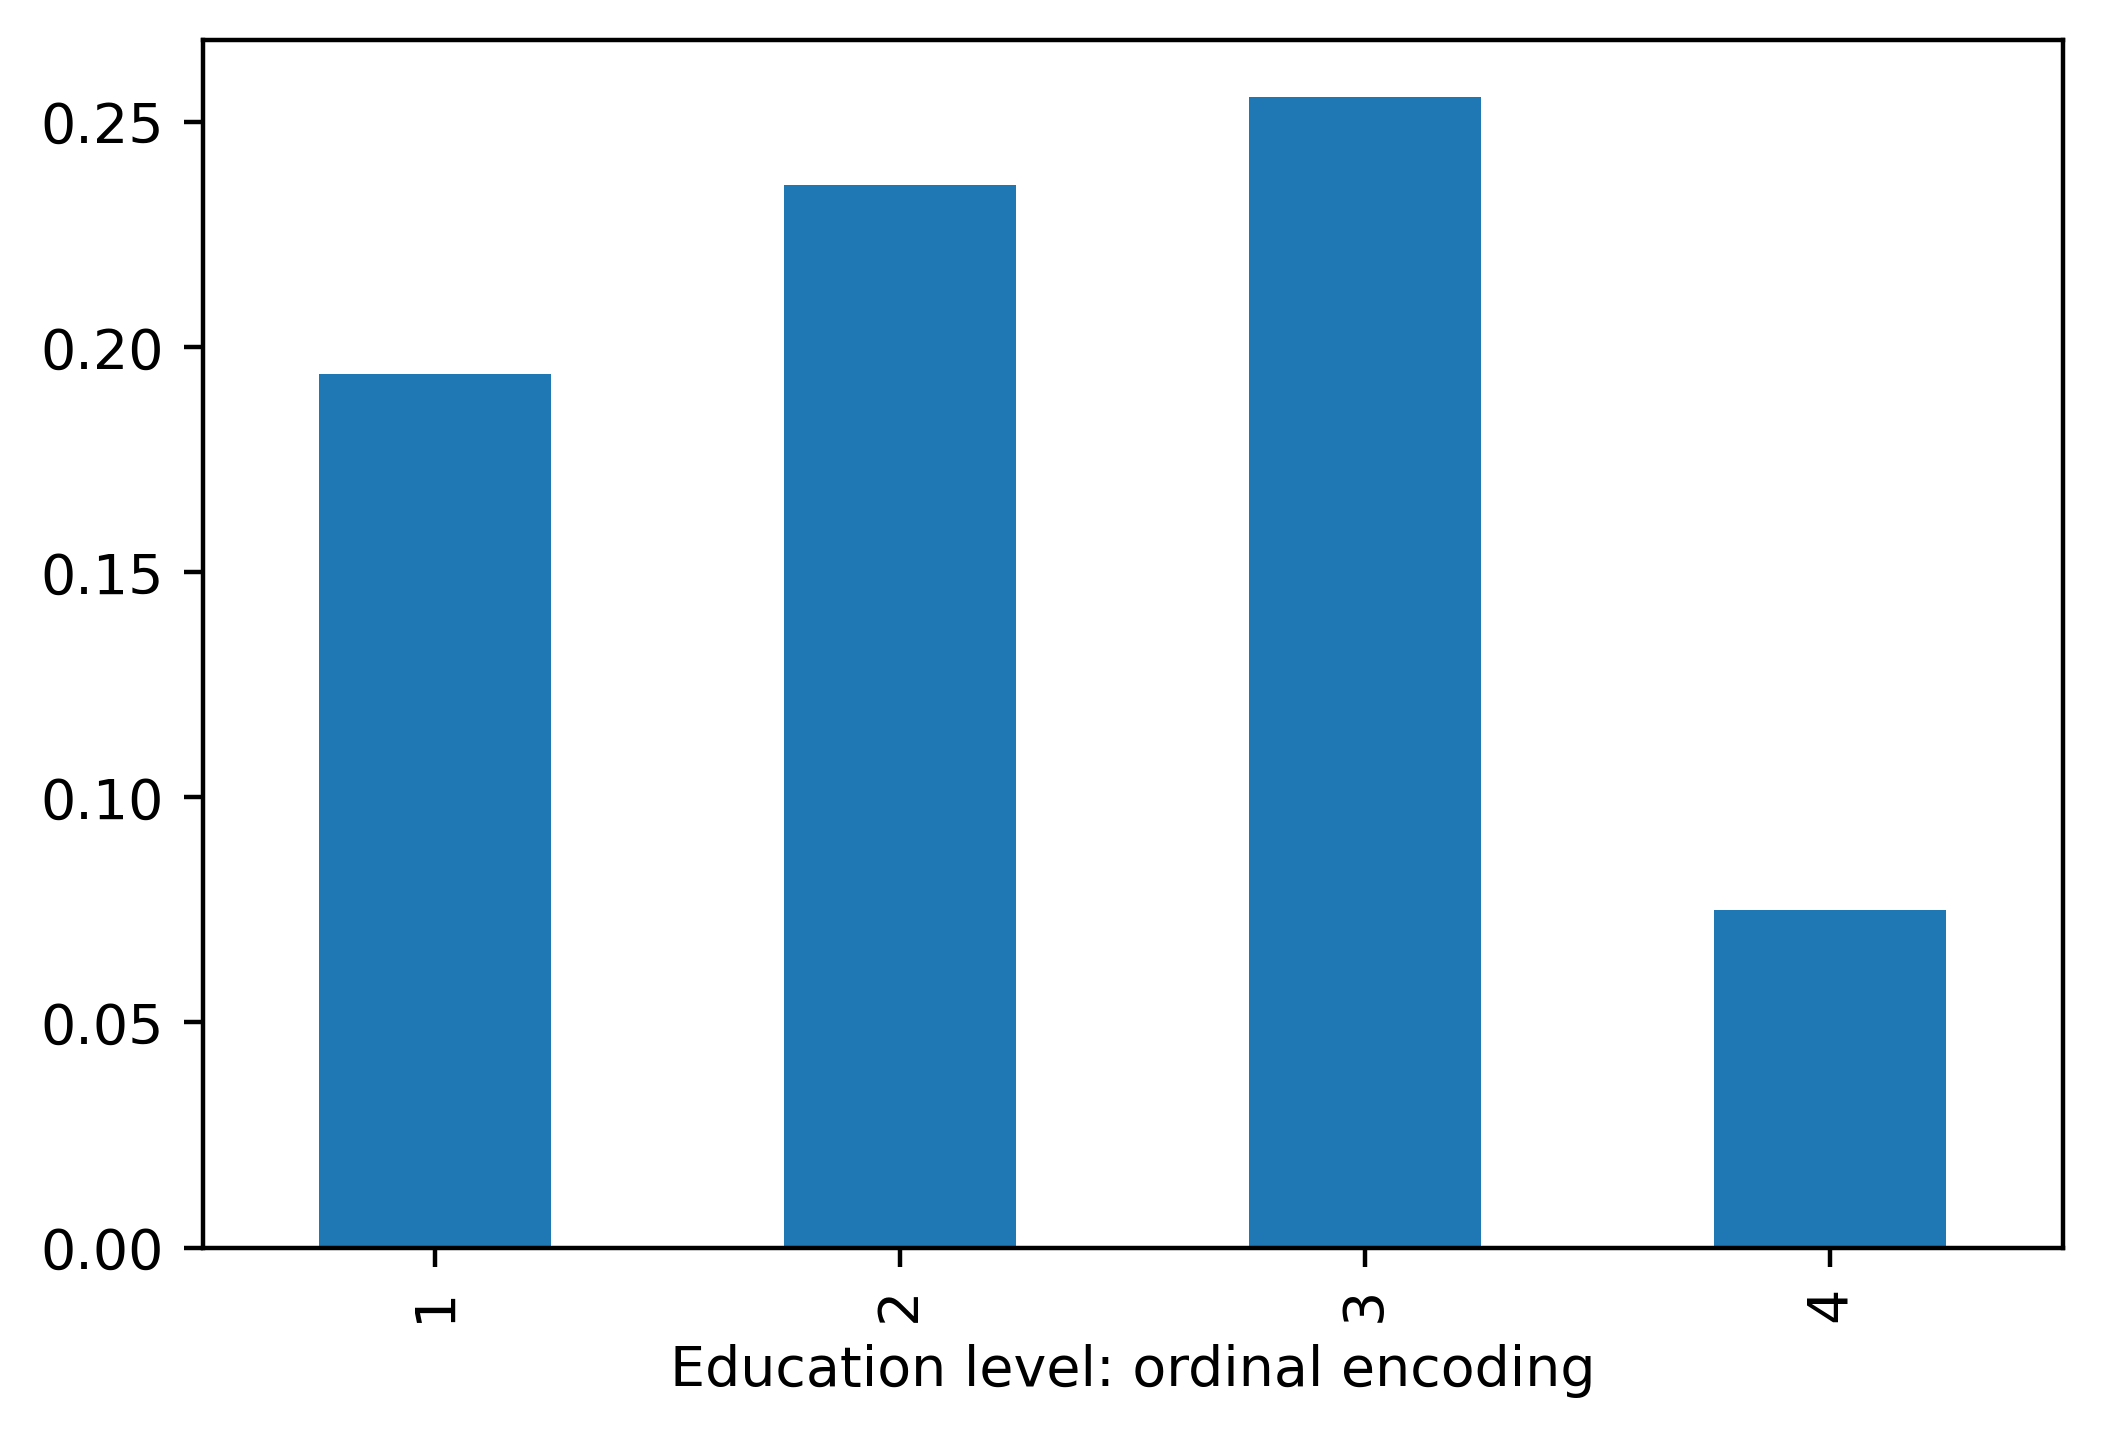

In [42]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
print(df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}))
plt.xlabel('Education level: ordinal encoding')

Machine learning algorithms only work with numbers so we need to encode our categorical features.

Our aim is to classify a binary response thus, in order to build our prediction, we can look at the average values of the response variable for each different level of  the categorical features and make a guess.

Moreover, this can give us an idea about the encoding procedure to apply on categorical features.

In this case we can see if an ordinal encoding will work well with a linear model.

Looks like that EDUCATION has a non-linear effect on the response.

It may be better use more complex algorithms, such as decision tree or random forest instead of a simple logistic regression that assumes linear effect of the features. 

In case we want to use a simpler and more interpretable linear model such as logistic regression we could avoid an ordinal encoding and use a different way of encoding categorical variables.

OHE is another way to encode categorical features that avoids the implied numerical structure of an ordinal encoding. 

## OHE with Pandas

In [43]:
# New column EDUCATION_CAT for the categorical labels 
cat_mapping = {1: "graduate school", 2: "university", 3: "high school", 4: "others"}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [44]:
# OHE
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school','high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


## Chekpoint

In [45]:
df_with_ohe.to_csv('Data/df_clean_3.csv', index=False) # saving

# Check point
# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL -> fine
# SEX -> fine
# EDUCATION -> merge undocumented categories('0, 5, 6' to --> '4 = others') + OHE
# MARRIAGE -> 
# AGE -> fine
# PAY_1-PAY_6 -> Adjustment Pay_1 type + drop of the missing ("not avaible") + To drop from PAY_2 to PAY_6 since invalid data (Related to the drop of the missing)
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month

# MARRIAGE

In [46]:
df_clean_3 = pd.read_csv('Data/df_clean_3.csv')
df_clean_3["MARRIAGE"].value_counts()


2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

'0 undocumented value', since low count I merge it with '3 = others'.

In [47]:
df_clean_3["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)
df_clean_3["MARRIAGE"].value_counts()


2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Checkpoint

In [48]:
df_clean_3.to_csv("Data/df_clean_4.csv", index=False)  # saving

# Check point
# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL -> fine
# SEX -> fine
# EDUCATION -> merge undocumented categories('0, 5, 6' to --> '4 = others') + OHE
# MARRIAGE -> merge undocumented categories('0' to --> '3 = others')
# AGE -> fine
# PAY_1-PAY_6 -> Adjustment Pay_1 type + drop of the missing ("not avaible") + To drop from PAY_2 to PAY_6 since invalid data (Related to the drop of the missing)
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month


In [49]:
df_clean_4 = pd.read_csv("Data/df_clean_4.csv")
df_clean_4

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0
